In [1]:
import xbbg
from xbbg import blp
import numpy as np
import pandas as pd
import datetime as DT
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.display.float_format = '{:,.2f}'.format

c:\users\boris\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\users\boris\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1

In [2]:
today = DT.date.today()
startdate = '1/1/2003'
enddate = today
writer = pd.ExcelWriter('mpca.xlsx')

In [3]:
def get_dict_inv(d):
    return {v: k for k, v in d.items()}

def standardize_data(df):
    return (df-df.mean())/df.std()

In [4]:
all_t={ 
"f1" : "CBT4TNCN Index",
"f2" : "TFF2HAIN Index",
"f3" : "CBTPTNCN Index",
"f4" : "TFF2HLFN Index",
"f5" : "CBT55NCN Index",
"f6" : "TFF2IAIN Index",
"f7" : "TFF2ILFN Index",
"f8" : "CBTP5NCN Index",
"f9" : "CBT3TNCN Index",
"f10" : "TFF2ELFN Index",
"f11" : "TFF2EAIN Index",
"f12" : "CBT3TCON Index",
"f13" : "IMM13NCN Index",
"f14" : "TFF2KAIN Index",
"f15" : "TFC2KLFN Index",
"f16" : "IMMO3NCN Index",
"f17" : "NYM1CNCN Index",
"f18" : "CFCDQMMN Index",
"f19" : "NYMOCNCN Index",
"f20" : "CFFDQMMN Index",
"f21" : "IMMPFNCN Index",
"f22" : "TFC1ELFN Index",
"f23" : "IMM6ANCN Index",
"f24" : "IMM6ANCL Index",
"f25" : "TFC1FLFN Index",
"f26" : "TFC1FAIN Index",
"f27" : "IMM3CNCN Index",
"f28" : "IMMOCNCN Index",
"f29" : "TFC1ALFN Index",
"f30" : "IMM5PNCN Index",
"f31" : "IMMOPNCN Index",
"f32" : "CFCDTMMN Index",
"f33" : "CMXOCNCN Index",
"f34" : "CFFDTMMN Index",
"f35" : "CFCDTMML Index",
"f36" : "IMM6MNCN Index",
"f37" : "IMMPMNCN Index",
"f38" : "IMM6MNCL Index",
"f39" : "TFC1HLFN Index",
"f40" : "TFC1HAIN Index",
"f41" : "IMMOUNCN Index",
"f42" : "IMM1UNCN Index",
"f43" : "TFC1GLFN Index",
"f44" : "TFC1GAIN Index",
"f45" : "IMM5JNCN Index",
"f46" : "IMMOJNCN Index",
"f47" : "TFC1DLFN Index",
"f48" : "TFF1DLFN Index",
"f49" : "TFC1DAIN Index",

}



all_t_inv= {v: k for k, v in all_t.items()}

In [5]:
df= blp.bdh(all_t.values(),'PX_LAST', startdate, enddate)
df.columns = df.columns.get_level_values(0)
df.rename(columns=lambda x:all_t_inv[x], inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49
2022-05-03,"-147,537.00","397,064.00","-86,962.00","229,261.00","-318,936.00","1,044,296.00","-700,505.00","-285,780.00","13,511.00","-172,257.00",...,"69,496.00","7,543.00","7,543.00","7,679.00","6,604.00","-100,794.00","-107,557.00","-62,626.00","-66,673.00","-68,013.00"
2022-05-10,"-85,972.00","353,325.00","-64,554.00","320,947.00","-325,674.00","1,068,881.00","-751,002.00","-283,364.00","15,453.00","-196,750.00",...,"71,012.00","7,543.00","7,543.00","7,679.00","6,604.00","-110,454.00","-111,617.00","-60,948.00","-61,518.00","-70,890.00"
2022-05-17,"-160,091.00","452,882.00","-155,515.00","162,710.00","-260,224.00","946,019.00","-613,754.00","-242,991.00","32,007.00","-205,146.00",...,"77,679.00","7,543.00","7,543.00","7,679.00","6,604.00","-102,309.00","-103,141.00","-60,597.00","-60,550.00","-66,393.00"
2022-05-24,"-225,124.00","609,700.00","-155,300.00","29,524.00","-120,527.00","883,449.00","-464,445.00","-82,363.00","28,502.00","-226,901.00",...,"76,288.00","7,543.00","7,543.00","7,679.00","6,604.00","-99,444.00","-98,550.00","-58,332.00","-57,481.00","-60,455.00"
2022-05-31,"-238,907.00","687,138.00","-178,119.00","-42,796.00","-217,788.00","864,641.00","-485,805.00","-199,469.00","19,761.00","-237,428.00",...,"84,516.00","7,543.00","7,543.00","7,679.00","6,604.00","-94,439.00","-93,960.00","-58,395.00","-57,811.00","-61,197.00"


In [6]:
TIME = df.index
print(TIME)

Index([2003-01-07, 2003-01-14, 2003-01-21, 2003-01-28, 2003-02-04, 2003-02-11,
       2003-02-18, 2003-02-25, 2003-03-04, 2003-03-11,
       ...
       2022-03-29, 2022-04-05, 2022-04-12, 2022-04-19, 2022-04-26, 2022-05-03,
       2022-05-10, 2022-05-17, 2022-05-24, 2022-05-31],
      dtype='object', length=1013)


In [7]:
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)
PCS = pca.fit_transform(df_normalized)

In [8]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)


      PC0   PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  ...  PC39  \
f1  -0.16  0.11 -0.09 -0.03  0.06  0.08  0.16 -0.15 -0.43  0.08  ... -0.08   
f2   0.20 -0.08  0.18  0.03 -0.02 -0.08  0.04  0.12  0.11 -0.04  ... -0.08   
f3  -0.16  0.12 -0.09 -0.03  0.08  0.07  0.17 -0.18 -0.41  0.07  ...  0.06   
f4  -0.15  0.10 -0.18 -0.02  0.06  0.19 -0.11 -0.11 -0.01  0.19  ... -0.06   
f5  -0.20 -0.03  0.12 -0.03 -0.01  0.20 -0.05 -0.11  0.10  0.21  ...  0.13   
f6   0.23 -0.03  0.00  0.04 -0.01 -0.21  0.09  0.03 -0.21 -0.02  ...  0.06   
f7  -0.22  0.01 -0.04 -0.04 -0.03  0.21 -0.10  0.02  0.23  0.03  ...  0.05   
f8  -0.20 -0.03  0.12 -0.03 -0.01  0.21 -0.04 -0.12  0.10  0.22  ... -0.10   
f9   0.00 -0.05 -0.11 -0.16 -0.40  0.07 -0.03 -0.24  0.10  0.13  ... -0.00   
f10 -0.11 -0.06 -0.12 -0.19 -0.32 -0.12  0.06 -0.04  0.06 -0.06  ... -0.03   
f11  0.10  0.03  0.13  0.20  0.28  0.18 -0.09  0.14  0.09  0.09  ... -0.06   
f12 -0.02  0.07  0.02  0.14  0.38 -0.10  0.02  0.32 -0.03 -0.08 

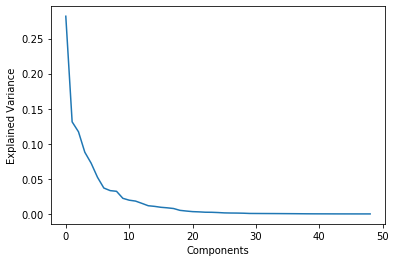

In [9]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()


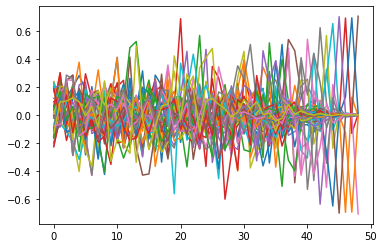

In [10]:
plt.plot(pca.components_)
plt.show()

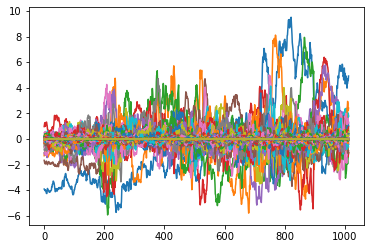

In [11]:
plt.plot(PCS)
plt.show()

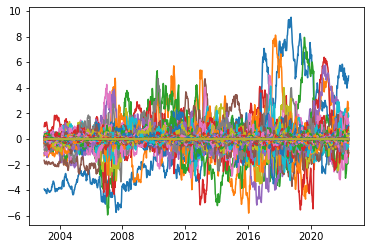

In [13]:
CFTC = pd.DataFrame.from_records(data=PCS, columns = ["f1" ,	"f2" ,	"f3" ,	"f4" ,	"f5" ,	"f6" ,	"f7" ,	"f8" ,	"f9" ,	"f10" ,	"f11" ,	"f12" ,	"f13" ,	"f14" ,	"f15" ,	"f16" ,	"f17" ,	"f18" ,	"f19" ,	"f20" ,	"f21" ,	"f22" ,	"f23" ,	"f24" ,	"f25" ,	"f26" ,	"f27" ,	"f28" ,	"f29" ,	"f30" ,	"f31" ,	"f32" ,	"f33" ,	"f34" ,	"f35" ,	"f36" ,	"f37" ,	"f38" ,	"f39" ,	"f40" ,	"f41" ,	"f42" ,	"f43" ,	"f44" ,	"f45" ,	"f46" ,	"f47" ,	"f48" ,	"f49" , ], index=TIME)

plt.plot(CFTC)
plt.show()

In [14]:
CFTC.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49
2003-01-07,-3.91,-1.30,-0.62,0.97,-1.08,-1.67,-0.28,-0.80,-0.25,0.13,...,-0.04,-0.05,-0.09,-0.01,0.05,-0.02,-0.02,-0.00,-0.00,-0.00
2003-01-14,-3.95,-1.06,-0.48,1.14,-1.19,-1.80,-0.62,-0.92,-0.23,0.08,...,-0.03,-0.04,-0.08,-0.01,0.05,-0.01,-0.02,-0.00,-0.00,-0.00
2003-01-21,-3.99,-0.95,-0.43,1.27,-1.15,-1.90,-0.87,-0.91,-0.23,0.05,...,-0.03,-0.02,-0.06,-0.00,0.06,-0.01,-0.03,-0.00,0.00,-0.01
2003-01-28,-4.04,-0.85,-0.43,1.21,-1.14,-1.93,-1.04,-0.81,-0.39,0.07,...,-0.03,-0.02,-0.05,-0.00,0.06,-0.01,-0.03,0.00,0.00,-0.01
2003-02-04,-3.96,-0.68,-0.61,0.99,-1.27,-1.95,-1.26,-0.79,-0.41,0.11,...,-0.03,-0.03,-0.05,0.02,0.07,-0.02,-0.03,0.00,0.00,-0.01


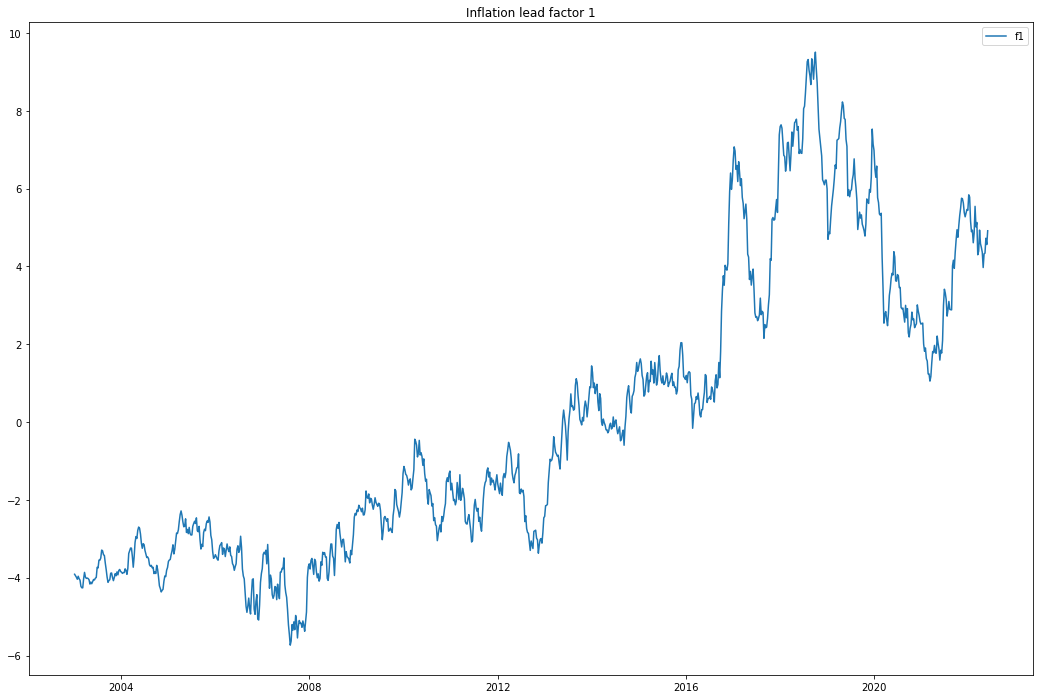

In [15]:
CFTC1 = CFTC.drop([ 	"f2" ,	"f3" ,	"f4" ,	"f5" ,	"f6" ,	"f7" ,	"f8" ,	"f9" ,	"f10" ,	"f11" ,	"f12" ,	"f13" ,	"f14" ,	"f15" ,	"f16" ,	"f17" ,	"f18" ,	"f19" ,	"f20" ,	"f21" ,	"f22" ,	"f23" ,	"f24" ,	"f25" ,	"f26" ,	"f27" ,	"f28" ,	"f29" ,	"f30" ,	"f31" ,	"f32" ,	"f33" ,	"f34" ,	"f35" ,	"f36" ,	"f37" ,	"f38" ,	"f39" ,	"f40" ,	"f41" ,	"f42" ,	"f43" ,	"f44" ,	"f45" ,	"f46" ,	"f47" ,	"f48" ,	"f49" , ], axis=1)
CFTC1.plot(figsize=(18,12), title="Inflation lead factor 1")
plt.show()

In [16]:
CFTC.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49
2022-05-03,4.33,-0.75,-1.70,-1.08,-0.30,0.63,-1.18,2.09,-0.77,1.27,...,-0.18,-0.12,-0.14,-0.13,0.01,0.11,0.05,-0.00,0.01,-0.00
2022-05-10,4.34,-1.41,-1.94,-1.24,0.08,0.64,-0.72,1.88,-0.87,1.68,...,-0.16,-0.13,-0.07,-0.06,-0.02,0.01,-0.02,-0.01,0.00,-0.00
2022-05-17,4.73,-1.42,-1.62,-1.39,-0.03,0.96,-0.43,1.74,0.10,1.58,...,-0.11,-0.14,-0.10,-0.14,-0.02,-0.02,-0.02,-0.03,0.01,-0.00
2022-05-24,4.56,-1.35,-1.28,-1.06,0.02,1.03,-0.48,1.67,0.67,2.03,...,-0.05,-0.08,-0.01,-0.07,-0.03,-0.05,-0.03,-0.03,0.01,-0.00
2022-05-31,4.92,-1.07,-1.10,-1.06,0.25,0.44,-0.42,1.77,0.79,1.82,...,0.00,-0.09,-0.01,-0.13,-0.04,-0.07,-0.04,-0.03,0.00,-0.00


In [17]:
CFTC1.tail()

,f1
2022-05-03,4.33
2022-05-10,4.34
2022-05-17,4.73
2022-05-24,4.56
2022-05-31,4.92


In [18]:
CFTC.to_excel('C:\\B\\MPCA\\CFTCPCA.xlsx')